# Navigation

---

### 0. Get Prepared
Follow these instructions if you are working locally (you want to setup a Jupyter Notebook locally).
 Otherwise skip to Section 1.

#### 0.1 Setup the right Python version
Use Python 3.6. You may want to either use a virtual env or setup a Conda environment as explained here:

https://github.com/udacity/deep-reinforcement-learning#dependencies

#### 0.2 Get the python dependencies requirements.txt
Checkout the ./python folder of the Udacity DRLND repo:

https://github.com/udacity/deep-reinforcement-learning

It has a requirements.txt to ensure installing the necessary dependencies in the version specified by the course
(do this only when you want to work locally). Otherwise use the reference notebook provided by the course which is pre setup properly.

#### 0.3 Get the Pre-built Unity Environment
The course requires you to use the pre-built environment.
Get the right version for you from here:

https://s3-us-west-1.amazonaws.com/udacity-drlnd

For e.g. to get the NoVis version for Linux use this link
https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Linux_NoVis.zip

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

Make sure you have the python folder with the right requirements.txt. See Section 0.

In [1]:
import os
deps_dir="../../deep-reinforcement-learning/python/"
deps_file=deps_dir + "/requirements.txt"
if os.path.exists(deps_file):
    !pip -q install $deps_dir
else:
    print("Could not locate requirements.txt. Check section 0")

  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

#IMPORTANT: The version with visualization never worked for me so I opted to use the NoVis (no visualization) version.
env = UnityEnvironment(file_name="Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

<span style="color:red">WARNING: DON'T EXECUTE THIS CELL IF YOU WILL ACTUALLY USE THE ENV FOR TRAINING BELOW. The provided unity env is buggy and training simply fails. You would need to restart the Kernel.</span>.

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [ ]:
print("resetting environment")
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
print("getting initial state")
score = 0                                          # initialize the score
index=0
while True:
    print(f"step: {index}", end='\r')
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    index += 1
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

### 4. Training a Smart Agent

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- If you use the Udacity Jupyter notebook, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine!
In that case make sure you don't use the NoVis environment locally

In [5]:
import time
import torch

def dqn(agent,n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):

    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state.astype(np.float32), action, reward, next_state.astype(np.float32), done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), "trained_models/" + "checkpoint_dropout_p{}_hiddenlayers{}.pth".format(agent.qnetwork_local.drop_p,agent.qnetwork_local.hidden_layers_config))
            break
    return scores

def plot_scores(scores, axis_handle=None, label=""):
    # plot the scores
    if axis_handle is None:
        f, axis_handle = plt.subplots()
    axis_handle.plot(np.arange(len(scores)), scores,label=label)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.legend()
    return axis_handle


found device: cpu
--------------
Trying out dropout_probab 0.0 and hidden_layers [64, 64]
Initializing model:state_size: 37, action_size: 4, hidden_layers_config: [64, 64], xavier_init: False
Initializing model:state_size: 37, action_size: 4, hidden_layers_config: [64, 64], xavier_init: False
Device to be used: cpu
Episode 100	Average Score: 1.14
Episode 200	Average Score: 4.22
Episode 300	Average Score: 7.61
Episode 400	Average Score: 10.08
Episode 482	Average Score: 13.04
Environment solved in 382 episodes!	Average Score: 13.04
--------------
Trying out dropout_probab 0.3 and hidden_layers [64, 64]
Initializing model:state_size: 37, action_size: 4, hidden_layers_config: [64, 64], xavier_init: False
Initializing model:state_size: 37, action_size: 4, hidden_layers_config: [64, 64], xavier_init: False
Device to be used: cpu
Episode 100	Average Score: 0.72
Episode 200	Average Score: 4.59
Episode 300	Average Score: 7.26
Episode 400	Average Score: 10.64
Episode 500	Average Score: 12.83
Epi

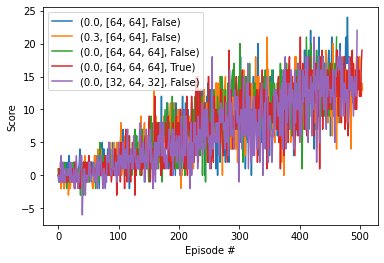

In [6]:
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from dqn_agent_navigation_project import Agent
#env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")
#env_info = env.reset(train_mode=True)[brain_name]

agents_params=[
    (0.0, [64,64],False),
    (0.3, [64,64], False),
    (0.0,[64,64,64], False),
    (0.0,[64,64,64], True),
    (0.0,[32,64,32], False)
]

axis_handle=None
for agent_params in agents_params:
    print("--------------\nTrying out dropout_probab {} and hidden_layers {}".format(agent_params[0],agent_params[1]))
    agent = Agent(state_size=37, action_size=4, seed=0,drop_p=agent_params[0],hidden_layers_config=agent_params[1],
                  duelling_networks=agent_params[2],
                  priority_experience=False)
    scores = dqn(agent=agent)
    axis_handle=plot_scores(scores,axis_handle,label=str(agent_params))

### 5. Shutting Down
When finished, you can close the environment.

<span style="color:red">WARNING: Do this only if you are really done. You can't reopen the env unless you restart the Kernel due to buggy unity env :( </span>.

In [8]:
env.close() # Ensuring the environment is not closed so that training can commence